In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import  mean_squared_error, r2_score

import statsmodels.api as sm

In [2]:
cal = pd.read_csv('calendar.csv.gz')
list = pd.read_csv('listings.csv.gz')
revs = pd.read_csv('reviews.csv.gz')
nhood = pd.read_csv('neighbourhoods.csv')

In [74]:
print(cal.date.min(),cal.date.max())
print(revs.date.min(),revs.date.max())
# print(list.last_review.min(),list.last_review.max())

2018-07-05 2019-07-04
2009-05-03 2018-07-05


In [76]:
list.last_review.min()

TypeError: unorderable types: str() <= float()

In [4]:
# List Transformation1

list.price = list.price.str.replace('$','')
list.price = list.price.str.replace(',','')

list.weekly_price = list.weekly_price.str.replace('$','')
list.weekly_price = list.weekly_price.str.replace(',','')

list.monthly_price = list.monthly_price.str.replace('$','')
list.monthly_price = list.monthly_price.str.replace(',','')

list.security_deposit = list.security_deposit.str.replace('$','')
list.security_deposit = list.security_deposit.str.replace(',','')

list.cleaning_fee = list.cleaning_fee.str.replace('$','')
list.cleaning_fee = list.cleaning_fee.str.replace(',','')

list.extra_people = list.extra_people.str.replace('$','')
list.extra_people = list.extra_people.str.replace(',','')

In [5]:
# List Transformation2

list.price = pd.to_numeric(list.price)
list.weekly_price = pd.to_numeric(list.weekly_price)
list.monthly_price = pd.to_numeric(list.monthly_price)
list.security_deposit = pd.to_numeric(list.security_deposit)
list.cleaning_fee = pd.to_numeric(list.cleaning_fee)
list.extra_people = pd.to_numeric(list.extra_people)

In [ ]:
#Impute the Data
list=list[~list['zipcode'].isnull()]   # remove nulls from one column

In [72]:
# pd.set_option('display.max_colu?mns', 96)
pd.set_option('display.max_rows', 96)
list.head().T

,0,1,2,3,4
id,958,5858,7918,8014,8142
listing_url,https://www.airbnb.com/rooms/958,https://www.airbnb.com/rooms/5858,https://www.airbnb.com/rooms/7918,https://www.airbnb.com/rooms/8014,https://www.airbnb.com/rooms/8142
scrape_id,20180705131954,20180705131954,20180705131954,20180705131954,20180705131954
last_scraped,2018-07-05,2018-07-05,2018-07-05,2018-07-05,2018-07-05
name,"Bright, Modern Garden Unit - 1BR/1B",Creative Sanctuary,A Friendly Room - UCSF/USF - San Francisco,Newly Remodeled room in big house WIFI market,Friendly Room Apt. Style -UCSF/USF - San Franc...
summary,Our bright garden unit overlooks a grassy back...,NaN,Nice and good public transportation. 7 minute...,Freshly painted newly done laminate floor with...,Nice and good public transportation. 7 minute...
space,"Newly remodeled, modern, and bright garden uni...",We live in a large Victorian house on a quiet ...,Room rental-sunny view room/sink/Wi Fi (inner ...,The room is recently painted in the color of c...,Room rental Sunny view Rm/Wi-Fi/TV/sink/large ...
description,Our bright garden unit overlooks a grassy back...,We live in a large Victorian house on a quiet ...,Nice and good public transportation. 7 minute...,Freshly painted newly done laminate floor with...,Nice and good public transportation. 7 minute...
experiences_offered,none,none,none,none,none
neighborhood_overview,*Quiet cul de sac in friendly neighborhood *St...,I love how our neighborhood feels quiet but is...,"Shopping old town, restaurants, McDonald, Whol...","The neighborhood is very residential, close to...",NaN


In [30]:
# #list the rows that meet the required condition
# list[list['cleaning_fee'].isnull()]
# list[list['cleaning_fee']==700]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
2478,13357698,https://www.airbnb.com/rooms/13357698,20180705131954,2018-07-05,Large family friendly house in SF w/stunning v...,A large family home with amazing views & parki...,What makes our place so warm and inviting: * S...,A large family home with amazing views & parki...,none,"We are centrally situated in a safe, beautiful...",...,t,STR-0000655,"{""SAN FRANCISCO""}",t,f,moderate,f,f,2,0.17


In [6]:
dfcorr=list.corr()
# dfcorr.price.sort_values()

In [7]:
dfcorr.head()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
id,1.000000e+00,-5.372197e-14,NaN,NaN,NaN,5.333849e-01,NaN,1.174180e-01,1.174180e-01,NaN,...,-4.647773e-01,2.241529e-02,7.797402e-03,4.420848e-02,-2.409000e-02,-2.902598e-02,2.907084e-02,8.044867e-02,1.550099e-01,1.949230e-01
scrape_id,-5.372197e-14,1.000000e+00,NaN,NaN,NaN,1.214475e-14,NaN,9.219660e-15,9.219660e-15,NaN,...,-1.643336e-14,9.292910e-16,9.766126e-16,-4.512681e-16,-9.317798e-16,-2.594602e-15,-8.116948e-17,-4.006421e-15,7.520405e-17,-2.407295e-15
thumbnail_url,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medium_url,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xl_picture_url,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dfcorr.price.sort_values()

reviews_per_month                -1.958337e-01
number_of_reviews                -1.532205e-01
calculated_host_listings_count   -9.069535e-02
host_listings_count              -4.357050e-02
host_total_listings_count        -4.357050e-02
host_id                          -3.639688e-02
id                               -1.440011e-02
availability_365                 -9.364529e-03
minimum_nights                   -8.265356e-03
maximum_nights                   -8.094194e-04
scrape_id                         1.027096e-15
review_scores_value               7.222120e-03
zipcode                           1.549825e-02
longitude                         1.562531e-02
review_scores_checkin             3.086156e-02
availability_90                   3.245812e-02
review_scores_communication       6.380040e-02
availability_60                   6.394773e-02
availability_30                   7.407128e-02
review_scores_accuracy            7.967539e-02
extra_people                      9.082222e-02
review_scores

In [50]:
lreg_cols_master = ['square_feet','weekly_price','cleaning_fee','accommodates','bedrooms','beds','bathrooms','guests_included','zipcode']
lreg_cols = ['price','weekly_price','cleaning_fee','accommodates','bedrooms','beds','bathrooms','guests_included','zipcode']

In [54]:
dflreg = list[lreg_cols]
dflreg['const']=1
dflreg.head()
# dflreg.shape

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,price,weekly_price,cleaning_fee,accommodates,bedrooms,beds,bathrooms,guests_included,zipcode,const
0,170.0,1120.0,100.0,3,1,2.0,1.0,2,94117.0,1
1,235.0,1600.0,100.0,5,2,3.0,1.0,2,94110.0,1
2,65.0,485.0,50.0,2,1,1.0,4.0,1,94117.0,1
3,63.0,370.0,30.0,1,1,1.0,2.0,1,94127.0,1
4,65.0,490.0,50.0,2,1,1.0,4.0,1,94117.0,1


In [56]:
dflreg=pd.get_dummies(data=dflreg, columns=['zipcode'])
dflreg.head().T

KeyError: "['zipcode'] not in index"

In [59]:
dflreg.drop(columns=['zipcode_94965.0'],inplace=True)
dflreg.head().T

,0,1,2,3,4
price,170.0,235.0,65.0,63.0,65.0
weekly_price,1120.0,1600.0,485.0,370.0,490.0
cleaning_fee,100.0,100.0,50.0,30.0,50.0
accommodates,3.0,5.0,2.0,1.0,2.0
bedrooms,1.0,2.0,1.0,1.0,1.0
beds,2.0,3.0,1.0,1.0,1.0
bathrooms,1.0,1.0,4.0,2.0,4.0
guests_included,2.0,2.0,1.0,1.0,1.0
const,1.0,1.0,1.0,1.0,1.0
zipcode_94014.0,0.0,0.0,0.0,0.0,0.0


In [60]:
#modify contents
#df.loc[df['First Season'] > 1990, 'First Season'] = 1


dflreg['cleaning_fee'].fillna(0, inplace=True)
dflreg['beds'].fillna(0, inplace=True)
dflreg['bathrooms'].fillna(0, inplace=True)

In [61]:
dflreg.head()

,price,weekly_price,cleaning_fee,accommodates,bedrooms,beds,bathrooms,guests_included,const,zipcode_94014.0,...,zipcode_94122.0,zipcode_94123.0,zipcode_94124.0,zipcode_94127.0,zipcode_94129.0,zipcode_94131.0,zipcode_94132.0,zipcode_94133.0,zipcode_94134.0,zipcode_94158.0
0,170.0,1120.0,100.0,3,1,2.0,1.0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
1,235.0,1600.0,100.0,5,2,3.0,1.0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
2,65.0,485.0,50.0,2,1,1.0,4.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,63.0,370.0,30.0,1,1,1.0,2.0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
4,65.0,490.0,50.0,2,1,1.0,4.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


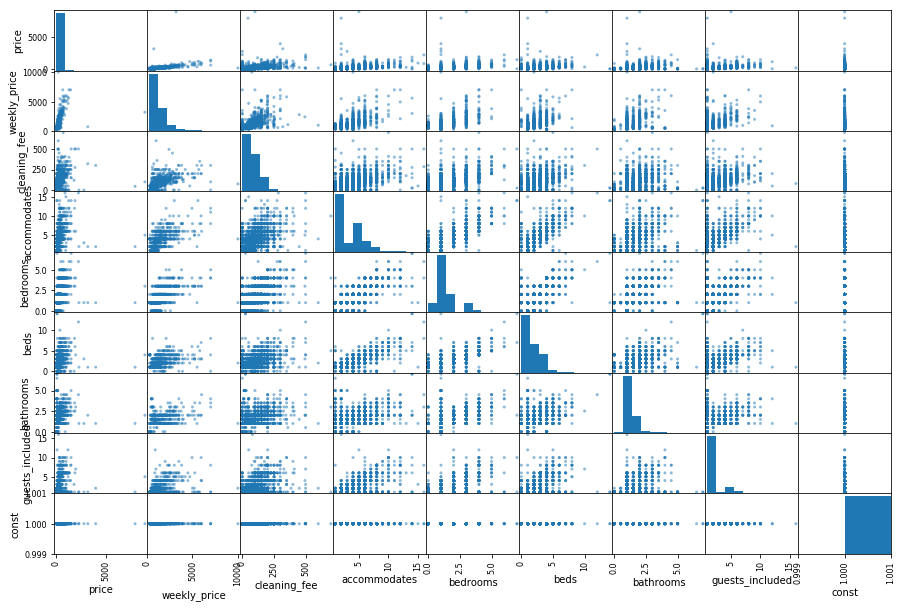

In [35]:
pd.plotting.scatter_matrix(dflreg,figsize=(15,10));

In [62]:
y=dflreg.price
X=dflreg.drop(['price','weekly_price'],axis=1)

In [63]:
X_chunk, X_test, y_chunk, y_test = train_test_split(X, y, test_size=0.20, random_state=47)
X_train, X_vald, y_train, y_vald = train_test_split(X_chunk, y_chunk, test_size=0.20, random_state=47)

In [64]:
print(X_train.shape, X_vald.shape, X_test.shape)
print(y_train.shape, y_vald.shape, y_test.shape)

(2988, 35) (747, 35) (934, 35)
(2988,) (747,) (934,)


In [65]:
lmodel = linear_model.LinearRegression()
lmodel.fit(X_train,y_train)
y_pred = lmodel.predict(X_test)

In [66]:
print('Coefficients: \n', lmodel.coef_)

Coefficients: 
 [ 6.74961631e-01  1.82748778e+01  4.62961443e+01  5.12702380e+00
  5.59064404e+01  1.60737471e+00 -5.12194731e-11 -5.02143178e+01
  2.46866367e+01  8.21883400e+01  7.45504136e+01  3.50998114e+02
  1.11169370e+02  3.52264210e+01  1.37706239e+02  1.01005735e+02
  9.16033919e+00  1.18696597e+01 -2.99495046e+01  5.26000215e+01
  7.89111903e+01  4.63889674e+01  3.62384470e+01  1.12968223e+01
  6.57476568e+01 -2.06495767e+01  9.67966951e+01 -4.17788848e+01
 -1.94392312e+01  2.98704160e+01  3.45779833e+01 -5.99358038e+01
  1.40882341e+02 -4.13913165e+01  5.66842679e+01]


In [67]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 16239.95


In [68]:
print("Variance squared error: %.2f"
      % r2_score(y_test, y_pred))

Variance squared error: 0.51


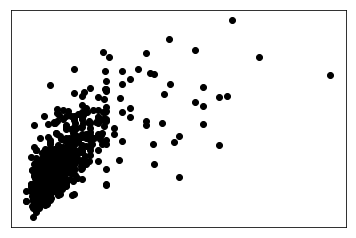

In [69]:
# Plot outputs
plt.scatter(y_test, y_pred,  color='black')
#plt.plot(y_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [70]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     25.51
Date:                Wed, 01 Aug 2018   Prob (F-statistic):          1.01e-138
Time:                        03:39:20   Log-Likelihood:                -20928.
No. Observations:                2988   AIC:                         4.193e+04
Df Residuals:                    2953   BIC:                         4.214e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
cleaning_fee        0.6750      0.092     

In [45]:
y_resd=(y_pred-y_test)*100/(y_test+1)
y_resd.max()


8941.566150547693

In [10]:

nhood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
neighbourhood_group    0 non-null float64
neighbourhood          37 non-null object
dtypes: float64(1), object(1)
memory usage: 672.0+ bytes


In [49]:
dflreg.describe()

,price,weekly_price,cleaning_fee,accommodates,bedrooms,beds,bathrooms,guests_included,const
count,4693.000000,1027.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.0
mean,217.701470,1307.090555,78.309184,3.339655,1.389516,1.828681,1.284679,1.834860,1.0
std,264.392052,969.753306,67.488113,1.993307,0.940693,1.227201,0.625998,1.440125,0.0
min,0.000000,250.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,100.000000,750.000000,30.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.0
50%,155.000000,1000.000000,69.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.0
75%,250.000000,1500.000000,100.000000,4.000000,2.000000,2.000000,1.500000,2.000000,1.0
max,9000.000000,9999.000000,700.000000,16.000000,7.000000,14.000000,7.000000,16.000000,1.0


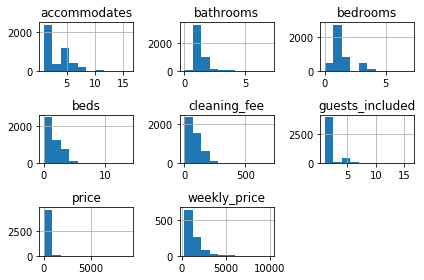

In [51]:
ax = dflreg[lreg_cols].hist(bins=10)
plt.tight_layout()

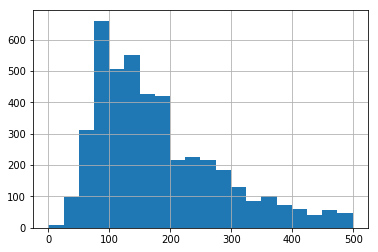

In [60]:
dflreg['price'][dflreg['price']<500].hist(bins=20);

In [65]:
dflreg['price'][[dflreg['price']>500 and dflreg['price']<2000]].hist(bins=20);

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [66]:
pd.crosstab(dflreg['bedrooms'], dflreg['beds'])

beds,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0,12.0,14.0
bedrooms,,,,,,,,,,,,
0,5,321,128,8,3,0,0,0,0,0,0,0
1,30,2084,533,68,25,6,0,0,1,0,0,1
2,13,11,561,193,67,9,4,2,0,0,0,0
3,8,5,17,238,137,38,17,3,0,0,0,0
4,7,1,0,0,51,44,14,8,5,0,0,0
5,1,0,0,0,0,9,2,2,5,1,0,0
6,0,0,0,0,0,0,2,1,1,0,1,0
7,0,0,0,0,0,0,0,1,0,0,0,1


In [23]:
revs.shape

(252914, 6)

In [67]:
list.zipcode.nunique()

29